# Hepatitis Dataset Information
Attribute information: 
1. Class: DIE, LIVE 
2. AGE: 10, 20, 30, 40, 50, 60, 70, 80 
3. SEX: male, female 
4. STEROID: no, yes 
5. ANTIVIRALS: no, yes 
6. FATIGUE: no, yes 
7. MALAISE: no, yes 
8. ANOREXIA: no, yes 
9. LIVER BIG: no, yes 
10. LIVER FIRM: no, yes 
11. SPLEEN PALPABLE: no, yes 
12. SPIDERS: no, yes 
13. ASCITES: no, yes 
14. VARICES: no, yes 
15. BILIRUBIN: 0.39, 0.80, 1.20, 2.00, 3.00, 4.00 -- see the note below 
16. ALK PHOSPHATE: 33, 80, 120, 160, 200, 250 
17. SGOT: 13, 100, 200, 300, 400, 500, 
18. ALBUMIN: 2.1, 3.0, 3.8, 4.5, 5.0, 6.0 
19. PROTIME: 10, 20, 30, 40, 50, 60, 70, 80, 90 
20. HISTOLOGY: no, yes

#### Problem at Hand:
Our target is to create the best model which pridicts our class variable which gives the information of living and dead when certain features are known.
#### Steps which will be followed in this Notebook.

1- Import all libraries

2- Import data 

3- Study Data

4- Perform EDA

5- Visualiza Necessary Attribute

6- Feature Engineering

7- Train Test Split

8- Scaling of features

9- Implementation of 9 Machine Learning Algorithms with default values

10- Comparision of all 9 Machine Learning Algorithms

11- ROC Curve of all 9 models

12- Hyperparameter tuning using Random Search on any 4 Algorithm

13- Comparasion of before and after hyperparameter tuning

14- ROC Curve of tuned models

#### Important all Libraries

In [1]:
# Import basic libraries 
import os
import numpy as np
import pandas as pd 
import seaborn as sns
from string import ascii_uppercase
from pandas import DataFrame
import matplotlib.pyplot as plt        
%matplotlib inline

import sklearn.preprocessing as skp
import sklearn.model_selection as skm
import os
#import classification modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
# Selection
from sklearn.model_selection import GridSearchCV as gs
from sklearn.model_selection import RandomizedSearchCV as rs
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
#import decision tree plotting libraries
#might need to run this command in anaconda prompt "conda install -c conda-forge pydotplus"
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
# Metrics
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score, recall_score, roc_auc_score,roc_curve, auc, f1_score 

E:\Anaconda\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


# Studying Dataset and Performing Data Wrangling on it

In [2]:
# Loading Dataset
missing=["na","--",".",".."]
td= pd.read_csv("C:/Users/Hassan Ahmed/Desktop/Data Science Cohort-1 FTI/hepatitis.csv",na_values=missing)
td.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,61,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,61,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,61,1
3,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,105,200,4.0,61,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.9,95,28,4.0,75,1


In [3]:
td.isnull().sum() # Checking for nulls

class             0
age               0
sex               0
steroid           0
antivirals        0
fatigue           0
malaise           0
anorexia          0
liver_big         0
liver_firm        0
spleen_palable    0
spiders           0
ascites           0
varices           0
bilirubin         0
alk_phosphate     0
sgot              0
albumin           0
protime           0
histology         0
dtype: int64

In [4]:
td["class"].replace((1,2),(0,1),inplace=True)

In [5]:
td["class"]=td["class"].astype("bool")

In [6]:
td.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,True,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,61,1
1,True,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,61,1
2,True,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,61,1
3,True,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,105,200,4.0,61,1
4,True,34,1,2,2,2,2,2,2,2,2,2,2,2,0.9,95,28,4.0,75,1


In [7]:
td.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 20 columns):
class             142 non-null bool
age               142 non-null int64
sex               142 non-null int64
steroid           142 non-null int64
antivirals        142 non-null int64
fatigue           142 non-null int64
malaise           142 non-null int64
anorexia          142 non-null int64
liver_big         142 non-null int64
liver_firm        142 non-null int64
spleen_palable    142 non-null int64
spiders           142 non-null int64
ascites           142 non-null int64
varices           142 non-null int64
bilirubin         142 non-null float64
alk_phosphate     142 non-null int64
sgot              142 non-null int64
albumin           142 non-null float64
protime           142 non-null int64
histology         142 non-null int64
dtypes: bool(1), float64(2), int64(17)
memory usage: 21.3 KB


In [8]:
td.describe()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,40.816901,1.105634,1.514085,1.838028,1.359155,1.619718,1.795775,1.823944,1.584507,1.809859,1.669014,1.880282,1.880282,1.382958,105.647887,83.507042,3.830493,61.704225,1.443662
std,12.189182,0.308456,0.501571,0.369729,0.481451,0.487174,0.404561,0.382216,0.494551,0.393801,0.472234,0.325781,0.325781,1.166526,47.375099,82.417700,0.618103,17.696732,0.498575
min,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.300000,26.000000,14.000000,2.100000,0.000000,1.000000
25%,32.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,0.700000,78.500000,32.250000,3.500000,56.250000,1.000000
50%,39.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,100.000000,58.000000,3.900000,61.000000,1.000000
75%,50.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.480000,119.750000,99.500000,4.200000,66.000000,2.000000
max,78.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,8.000000,295.000000,648.000000,6.400000,100.000000,2.000000


In [9]:
# Discretization of Age Column
td["age"]=np.where((td["age"]>10) & (td["age"]<20),"Teenagers",
                   np.where((td["age"]>=20) & (td["age"]<=30),"Adults",
                   np.where((td["age"]>30) & (td["age"]<=40),"Middle Aged",np.where((td["age"]<=10),"Children",
                            "Old"))))

In [10]:
td["age"]=pd.Categorical(td.age,["Children",'Teenagers','Adults', 'Middle Aged', 'Old'],ordered=True)

In [11]:
td["age"].value_counts() 

Old            65
Middle Aged    46
Adults         30
Children        1
Teenagers       0
Name: age, dtype: int64

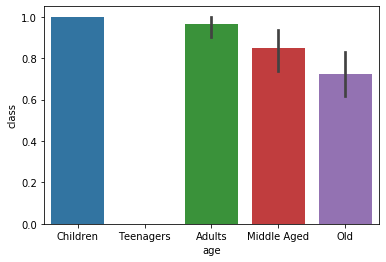

In [12]:
#draw a bar plot of Age vs. survival
sns.barplot(x="age", y="class", data=td)
plt.show()

In [13]:
td["sex"].replace((1,2),("Male","Female"),inplace=True)
td["sex"]=pd.Categorical(td.sex,["Male",'Female'],ordered=False)
td.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,True,Adults,Female,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,61,1
1,True,Old,Male,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,61,1
2,True,Old,Male,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,61,1
3,True,Middle Aged,Male,2,2,2,2,2,2,2,2,2,2,2,1.0,105,200,4.0,61,1
4,True,Middle Aged,Male,2,2,2,2,2,2,2,2,2,2,2,0.9,95,28,4.0,75,1


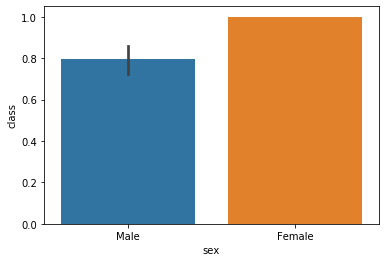

In [14]:
#draw a bar plot of survival by sex
sns.barplot(x="sex", y="class", data=td)

In [15]:
td.dropna(inplace=True) # Now dropping all nulls

In [16]:
td.dtypes

class                 bool
age               category
sex               category
steroid              int64
antivirals           int64
fatigue              int64
malaise              int64
anorexia             int64
liver_big            int64
liver_firm           int64
spleen_palable       int64
spiders              int64
ascites              int64
varices              int64
bilirubin          float64
alk_phosphate        int64
sgot                 int64
albumin            float64
protime              int64
histology            int64
dtype: object

In [17]:
#We have categorical variables .getdummies seperates the different categories of categorical variables as separate 
#binary columns
td1 = pd.get_dummies(td,drop_first=True)
#List of new columns
print(td1.columns)
td1.head(5)

Index(['class', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia',
       'liver_big', 'liver_firm', 'spleen_palable', 'spiders', 'ascites',
       'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime',
       'histology', 'age_Teenagers', 'age_Adults', 'age_Middle Aged',
       'age_Old', 'sex_Female'],
      dtype='object')


,class,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,...,alk_phosphate,sgot,albumin,protime,histology,age_Teenagers,age_Adults,age_Middle Aged,age_Old,sex_Female
0,True,1,2,2,2,2,1,2,2,2,...,85,18,4.0,61,1,0,1,0,0,1
1,True,1,2,1,2,2,1,2,2,2,...,135,42,3.5,61,1,0,0,0,1,0
2,True,2,2,1,2,2,2,2,2,2,...,96,32,4.0,61,1,0,0,0,1,0
3,True,2,2,2,2,2,2,2,2,2,...,105,200,4.0,61,1,0,0,1,0,0
4,True,2,2,2,2,2,2,2,2,2,...,95,28,4.0,75,1,0,0,1,0,0


In [18]:
td1["bilirubin"]=np.abs((td1["bilirubin"]-td1["bilirubin"].mean())/(td1["bilirubin"].std()))
td1["albumin"]=np.abs((td1["albumin"]-td1["albumin"].mean())/(td1["albumin"].std()))

In [19]:
y=td1["class"].copy()
X=td1.drop(columns=["class"])
print(y.shape)
print(X.shape)

(142,)
(142, 22)


# Feature Engineering Using Random Forest Algorithm

In [20]:
#Random Forest method for feature selection
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()    
#thit is how we get the feature importance with simple steps:
X_features=X.columns
model.fit(X, y)
# display the relative importance of each attribute
importances = np.around(model.feature_importances_,decimals=4)
imp_features= model.feature_importances_
feature_array=np.array(X_features)
sorted_features=pd.DataFrame(list(zip(feature_array,imp_features))).sort_values(by=1,ascending=False)
#print(sorted_features)
data_top=sorted_features[:X.shape[1]]
feature_to_rem=sorted_features[X.shape[1]:]
print("Unimportant Columms after simple Random Forrest\n",feature_to_rem)
rem_index=list(feature_to_rem.index)
print(rem_index)
print("Important Columms after simple Random Forrest\n",data_top)
data_top_index=list(data_top.index)
print("Important Columms after simple Random Forrest\n",data_top_index )
print(importances)
#0.0250 is a  selected threshold looking at the importance values this can be changed to any other value too
#cols_randfor_removed=[index for index,value in enumerate(importances) if value <= 0.0250]
#print(cols_randfor_removed)
X_randfor_sel = X.drop(X.columns[rem_index],axis=1)
#X_randfor_sel = X.drop(X.columns[cols_randfor_removed],axis=1)
features_randfor_select=X_randfor_sel.columns
print(features_randfor_select)

Unimportant Columms after simple Random Forrest
 Empty DataFrame
Columns: [0, 1]
Index: []
[]
Important Columms after simple Random Forrest
                   0         1
11        bilirubin  0.168090
14          albumin  0.105662
15          protime  0.105298
13             sgot  0.101021
8           spiders  0.079827
3           malaise  0.077623
12    alk_phosphate  0.063140
16        histology  0.055464
10          varices  0.046271
9           ascites  0.039465
5         liver_big  0.025366
2           fatigue  0.024422
7    spleen_palable  0.020083
4          anorexia  0.019624
21       sex_Female  0.016039
18       age_Adults  0.011443
19  age_Middle Aged  0.009825
20          age_Old  0.009261
6        liver_firm  0.009101
0           steroid  0.007211
1        antivirals  0.005763
17    age_Teenagers  0.000000
Important Columms after simple Random Forrest
 [11, 14, 15, 13, 8, 3, 12, 16, 10, 9, 5, 2, 7, 4, 21, 18, 19, 20, 6, 0, 1, 17]
[0.0072 0.0058 0.0244 0.0776 0.0196 0.0254 

E:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### Train Test Split

In [21]:
#creat train-test split parts for manual split

trainX, testX, trainy, testy= skm.train_test_split(X,y, test_size=0.25, random_state=99) #explain random state
print("\n shape of train split: ")
print(trainX.shape, trainy.shape)
print("\n shape of train split: ")
print(testX.shape, testy.shape)


 shape of train split: 
(106, 22) (106,)

 shape of train split: 
(36, 22) (36,)


### Making X Scalar for ML algorithms

In [22]:
X = skp.StandardScaler().fit(X).transform(X)

# All Machine Learning Algorithms with Default Parameters

## K Nearest Neighbor Algorithm

In [23]:
knn = KNeighborsClassifier()
knn.fit(trainX,trainy)
predictions = knn.predict(testX)
accknn=accuracy_score(testy, predictions)*100
print("Accuracy of KNN (%): \n", accknn)  
#get FPR
fprknn, tprknn, _ = roc_curve(testy, predictions)
aucknn=auc(fprknn, tprknn)*100
print("AUC OF KNN (%): \n", aucknn)
recallknn=recall_score(testy,predictions)*100
print("Recall of KNN is: \n",recallknn)
precknn=precision_score(testy,predictions)*100
print("Precision of KNN is: \n",precknn)

Accuracy of KNN (%): 
 77.77777777777779
AUC OF KNN (%): 
 48.275862068965516
Recall of KNN is: 
 96.55172413793103
Precision of KNN is: 
 80.0


## Gaussian Naive Bayes Algorithm

In [24]:
gnb=GaussianNB()
gnb.fit(trainX,trainy)
predictions = gnb.predict(testX)
accgnb=accuracy_score(testy, predictions)*100
print("Accuracy of Gaussian Naive Bayes (%): \n",accgnb)  
#get FPR
fprgnb, tprgnb, _ = roc_curve(testy, predictions)
aucgnb=auc(fprgnb, tprgnb)*100
print("AUC OF Gaussian Naive Bayes (%): \n", aucgnb)
recallgnb=recall_score(testy,predictions)*100
print("Recall of Gaussian Naive Bayes is: \n",recallgnb)
precgnb=precision_score(testy,predictions)*100
print("Precision of Gaussian Naive Bayes is: \n",precgnb)

Accuracy of Gaussian Naive Bayes (%): 
 72.22222222222221
AUC OF Gaussian Naive Bayes (%): 
 61.083743842364534
Recall of Gaussian Naive Bayes is: 
 79.3103448275862
Precision of Gaussian Naive Bayes is: 
 85.18518518518519


## Logistic Regression Algorithm

In [25]:
lrg=LogisticRegression(solver='lbfgs')
lrg.fit(trainX,trainy)
predictions = lrg.predict(testX)
acclrg=accuracy_score(testy, predictions)*100
print("Accuracy of Logistic regression (%): \n",acclrg)  
#get FPR
fprlrg, tprlrg, _ = roc_curve(testy, predictions)
auclrg=auc(fprlrg, tprlrg)*100
print("AUC OF Logistic regression (%): \n", auclrg)
recalllrg=recall_score(testy,predictions)*100
print("Recall of Logistic regression is: \n",recalllrg)
preclrg=precision_score(testy,predictions)*100
print("Precision of Logistic regression is: \n",preclrg)

Accuracy of Logistic regression (%): 
 83.33333333333334
AUC OF Logistic regression (%): 
 67.98029556650246
Recall of Logistic regression is: 
 93.10344827586206
Precision of Logistic regression is: 
 87.09677419354838


E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


## Neural Networks Algorithm

In [26]:
nn=MLPClassifier(solver='lbfgs',hidden_layer_sizes=20,batch_size=150,max_iter=100, random_state=1)
nn.fit(trainX,trainy)
predictions = nn.predict(testX)
accnn=accuracy_score(testy, predictions)*100
print("Accuracy of Neural Networks (%): \n",accnn)  
#get FPR
fprnn, tprnn, _ = roc_curve(testy, predictions)
aucnn=auc(fprnn, tprnn)*100
print("AUC OF Neural Networks (%): \n", aucnn)
recallnn=recall_score(testy,predictions)*100
print("Recall of Neural Networks is: \n",recallnn)
precnn=precision_score(testy,predictions)*100
print("Precision of Neural Networks is: \n",precnn)

Accuracy of Neural Networks (%): 
 30.555555555555557
AUC OF Neural Networks (%): 
 35.221674876847295
Recall of Neural Networks is: 
 27.586206896551722
Precision of Neural Networks is: 
 66.66666666666666


## Support Vector Machine Algorithm

In [27]:
svm=clf = SVC(gamma="auto",kernel='poly',degree=3)
svm.fit(trainX,trainy)
predictions = svm.predict(testX)
accsvm=accuracy_score(testy, predictions)*100
print("Accuracy of Support Vector Machine (%): \n",accsvm)  
#get FPR
fprsvm, tprsvm, _ = roc_curve(testy, predictions)
aucsvm=auc(fprsvm, tprsvm)*100
print("AUC OF Support Vector Machine (%): \n", aucsvm)
recallsvm=recall_score(testy,predictions)*100
print("Recall of Support Vector Machine is: \n",recallsvm)
precsvm=precision_score(testy,predictions)*100
print("Precision of Support Vector Machine is: \n",precsvm)

Accuracy of Support Vector Machine (%): 
 80.55555555555556
AUC OF Support Vector Machine (%): 
 66.25615763546799
Recall of Support Vector Machine is: 
 89.65517241379311
Precision of Support Vector Machine is: 
 86.66666666666667


## Decision Tree Algorithm

In [28]:
dt=DecisionTreeClassifier(max_depth=10,criterion="gini")
dt.fit(trainX,trainy)
predictions = dt.predict(testX)
accdt=accuracy_score(testy, predictions)*100
print("Accuracy of Decision Tree (%): \n",accdt)  
#get FPR
fprdt, tprdt, _ = roc_curve(testy, predictions)
aucdt=auc(fprdt, tprdt)*100
print("AUC OF Decision Tree (%): \n",aucdt)
recalldt=recall_score(testy,predictions)*100
print("Recall of Decision Tree is: \n",recalldt)
precdt=precision_score(testy,predictions)*100
print("Precision of Decision Tree is: \n",precdt)

Accuracy of Decision Tree (%): 
 72.22222222222221
AUC OF Decision Tree (%): 
 61.083743842364534
Recall of Decision Tree is: 
 79.3103448275862
Precision of Decision Tree is: 
 85.18518518518519


## Random forest Algorithm

In [29]:
rf=RandomForestClassifier()
rf.fit(trainX,trainy)
predictions = rf.predict(testX)
accrf=accuracy_score(testy, predictions)*100
print("Accuracy of Random Forest (%): \n",accrf)  
#get FPR
fprrf, tprrf, _ = roc_curve(testy, predictions)
aucrf=auc(fprrf, tprrf)*100
print("AUC OF Random Forest (%): \n", aucrf)
recallrf=recall_score(testy,predictions)*100
print("Recall of Random Forest is: \n",recallrf)
precrf=precision_score(testy,predictions)*100
print("Precision of Random Forest is: \n",precrf)

Accuracy of Random Forest (%): 
 77.77777777777779
AUC OF Random Forest (%): 
 64.5320197044335
Recall of Random Forest is: 
 86.20689655172413
Precision of Random Forest is: 
 86.20689655172413


E:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


## Ada Boost Algorithm

In [30]:
ab=AdaBoostClassifier()
ab.fit(trainX,trainy)
predictions = ab.predict(testX)
accab=accuracy_score(testy, predictions)*100
print("Accuracy of AdaBoost (%): \n",accab)  
#get FPR
fprab, tprab, _ = roc_curve(testy, predictions)
aucab=auc(fprab, tprab)*100
print("AUC OF AdaBoost (%): \n",aucab)
recallab=recall_score(testy,predictions)*100
print("Recall of AdaBoost is: \n",recallab)
precab=precision_score(testy,predictions)*100
print("Precision of AdaBoost is: \n",precab)

Accuracy of AdaBoost (%): 
 77.77777777777779
AUC OF AdaBoost (%): 
 59.11330049261083
Recall of AdaBoost is: 
 89.65517241379311
Precision of AdaBoost is: 
 83.87096774193549


## Gradient Descent Boosting Algorithm

In [31]:
gb=GradientBoostingClassifier()
gb.fit(trainX,trainy)
predictions = gb.predict(testX)
accgb=accuracy_score(testy, predictions)*100
print("Accuracy of Gradient Descent Boosting (%): \n",accgb)  
#get FPR
fprgb, tprgb, _ = roc_curve(testy, predictions)
aucgb=auc(fprgb, tprgb)*100
print("AUC OF Gradient Descent Boosting (%): \n", aucgb)
recallgb=recall_score(testy,predictions)*100
print("Recall of Gradient Descent Boosting is: \n",recallgb)
precgb=precision_score(testy,predictions)*100
print("Precision of Gradient Descent Boosting is: \n",precgb)

Accuracy of Gradient Descent Boosting (%): 
 80.55555555555556
AUC OF Gradient Descent Boosting (%): 
 66.25615763546799
Recall of Gradient Descent Boosting is: 
 89.65517241379311
Precision of Gradient Descent Boosting is: 
 86.66666666666667


# Comparison of all the Machine Learning Algorithms by Comparing some Evaluation Metrics

In [32]:
algos=["K Nearest Neighbor","Guassian Naive Bayes","Logistic Regression","Neural Networks","Support Vector Machine","Decision Tree","Random Forrest","AdaBoost","Gradient Descent Boosting"]
acc=[accknn,accgnb,acclrg,accnn,accsvm,accdt,accrf,accab,accgb]
auc=[aucknn,aucgnb,auclrg,aucnn,aucsvm,aucdt,aucrf,aucab,aucgb]
recall=[recallknn,recallgnb,recalllrg,recallnn,recallsvm,recalldt,recallrf,recallab,recallgb]
prec=[precknn,precgnb,preclrg,precnn,precsvm,precdt,precrf,precab,precgb]
comp={"Algorithms":algos,"Accuracies":acc,"Area Under the Curve":auc,"Recall":recall,"Precision":prec}
compdf=pd.DataFrame(comp)
print("________9 Machine Learning Algorithm Models with Default Hyperparametrs______________________")
display(compdf.sort_values(by=["Accuracies","Area Under the Curve","Recall","Precision"], ascending=False))


________9 Machine Learning Algorithm Models with Default Hyperparametrs______________________


,Algorithms,Accuracies,Area Under the Curve,Recall,Precision
2,Logistic Regression,83.333333,67.980296,93.103448,87.096774
4,Support Vector Machine,80.555556,66.256158,89.655172,86.666667
8,Gradient Descent Boosting,80.555556,66.256158,89.655172,86.666667
6,Random Forrest,77.777778,64.532020,86.206897,86.206897
7,AdaBoost,77.777778,59.113300,89.655172,83.870968
0,K Nearest Neighbor,77.777778,48.275862,96.551724,80.000000
1,Guassian Naive Bayes,72.222222,61.083744,79.310345,85.185185
5,Decision Tree,72.222222,61.083744,79.310345,85.185185
3,Neural Networks,30.555556,35.221675,27.586207,66.666667


Now as we look at the results we see that Logistic regression is the best algorithm and neural networks is the worst so we will take both and tune them when later on.

# ROC of all the Machine Learning Algorithms on default parameters

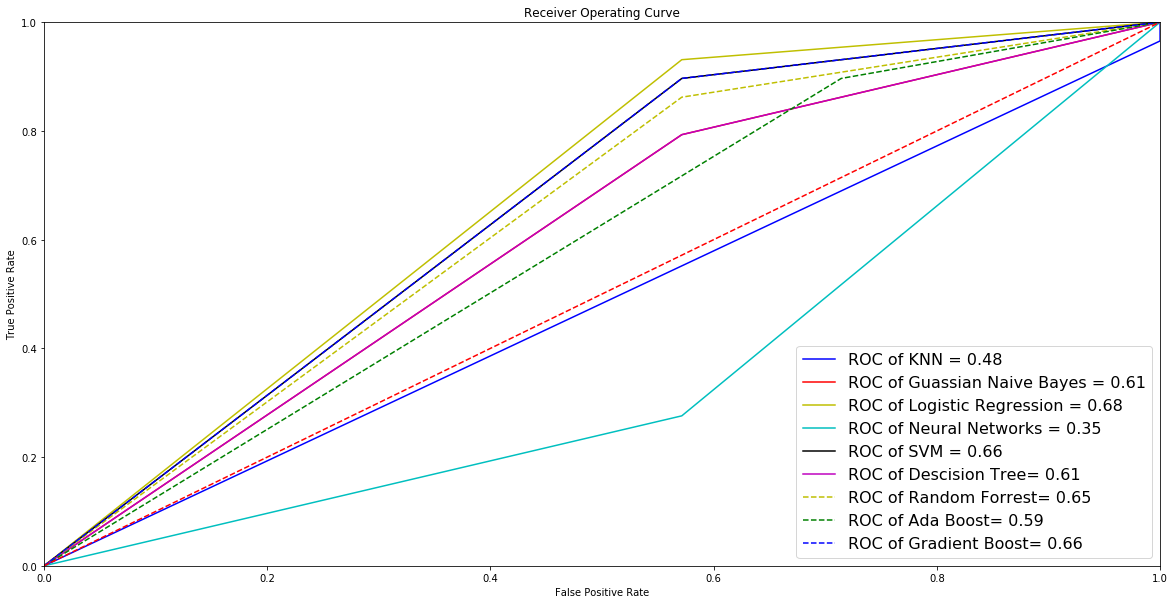

In [33]:
import sklearn.metrics as metrics
roc_auc1=metrics.auc(fprknn,tprknn)
roc_auc2=metrics.auc(fprgnb,tprgnb)
roc_auc3=metrics.auc(fprlrg,tprlrg)
roc_auc4=metrics.auc(fprnn,tprnn)
roc_auc5=metrics.auc(fprsvm,tprsvm)
roc_auc6=metrics.auc(fprdt,tprdt)
roc_auc7=metrics.auc(fprrf,tprrf)
roc_auc8=metrics.auc(fprab,tprab)
roc_auc9=metrics.auc(fprgb,tprgb)

# Method-I: PLot
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,10))
plt.title("Receiver Operating Curve")
plt.plot(fprknn,tprknn,"b",label="ROC of KNN = %0.2f" % roc_auc1)
plt.plot(fprgnb,tprgnb,"r",label="ROC of Guassian Naive Bayes = %0.2f" % roc_auc2)
plt.plot(fprlrg,tprlrg,"y",label="ROC of Logistic Regression = %0.2f" % roc_auc3)
plt.plot(fprnn,tprnn,"c",label="ROC of Neural Networks = %0.2f" % roc_auc4)
plt.plot(fprsvm,tprsvm,"k",label="ROC of SVM = %0.2f" % roc_auc5)
plt.plot(fprdt,tprdt,"m",label="ROC of Descision Tree= %0.2f" % roc_auc6)
plt.plot(fprrf,tprrf,"y--",label="ROC of Random Forrest= %0.2f" % roc_auc7)
plt.plot(fprab,tprab,"g--",label="ROC of Ada Boost= %0.2f" % roc_auc8)
plt.plot(fprgb,tprgb,"b--",label="ROC of Gradient Boost= %0.2f" % roc_auc9)
plt.rcParams.update({'font.size': 16})
plt.legend(loc="lower right")
plt.plot([0, 1],[0, 1],"r--")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")

plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=22)

# Hyperparameter Tuning using Random Search on any 4 Algorithms

## Hyperparameter Tuning on K Nearest Neighbor using Random Search

In [34]:
from sklearn.model_selection import RandomizedSearchCV as rs
# K Nearest Neighbor with random search
parameters={"algorithm":['auto','ball_tree','kd_tree','brute'],"n_neighbors":range(1,10,1),"p":[1,2],"weights":["uniform","distance"]}
clf_knn=KNeighborsClassifier()
clfknnrs=rs(clf_knn,parameters,cv=5,scoring="precision")
clfknnrs.fit(trainX,trainy)
predictions = clfknnrs.predict(testX)
accknnrs=accuracy_score(testy, predictions)*100
print("Accuracy of KNN after Hyperparameter Tuning (%): \n",accknnrs)  
#get FPR
fprknnrs, tprknnrs, _ = roc_curve(testy, predictions)
#aucdtrs=auc(fprdtrs, tprdtrs)*100
#print("AUC OF Decision Tree after Hyperparameter Tuning (%): \n",aucdtrs)
recallknnrs=recall_score(testy,predictions)*100
print("Recall of KNN after Hyperparameter Tuning is: \n",recallknnrs)
precknnrs=precision_score(testy,predictions)*100
print("Precision of KNN after Hyperparameter Tuning is: \n",precknnrs)

#examnine the best model
#single best score achieved accross all params
print("Best Score (%): \n",clfknnrs.best_score_*100)
#Dictionary Containing the parameters 
print("Best Parameters: \n",clfknnrs.best_params_)

print("Best Estimators: \n",clfknnrs.best_estimator_)

Accuracy of KNN after Hyperparameter Tuning (%): 
 66.66666666666666
Recall of KNN after Hyperparameter Tuning is: 
 79.3103448275862
Precision of KNN after Hyperparameter Tuning is: 
 79.3103448275862
Best Score (%): 
 88.06169782862348
Best Parameters: 
 {'weights': 'uniform', 'p': 1, 'n_neighbors': 2, 'algorithm': 'ball_tree'}
Best Estimators: 
 KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=1,
                     weights='uniform')


E:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


# Hyperparameter Tuning on Logistic Regression using Random Search

In [35]:
from sklearn.model_selection import RandomizedSearchCV as rs
# Logistic Regression with random search
parameters={"solver":['lbfgs','newton-cg','liblinear','sag','saga'],"max_iter":range(100,500,100)}
clf_lrg=LogisticRegression()
clflrgrs=rs(clf_lrg,parameters,cv=5,scoring="precision")
clflrgrs.fit(trainX,trainy)
predictions = clflrgrs.predict(testX)
acclrgrs=accuracy_score(testy, predictions)*100
print("Accuracy of Logistic Regression after Hyperparameter Tuning (%): \n",acclrgrs)  
#get FPR
fprlrgrs, tprlrgrs, _ = roc_curve(testy, predictions)
#aucdtrs=auc(fprdtrs, tprdtrs)*100
#print("AUC OF Decision Tree after Hyperparameter Tuning (%): \n",aucdtrs)
recalllrgrs=recall_score(testy,predictions)*100
print("Recall of Logistic Regression after Hyperparameter Tuning is: \n",recalllrgrs)
preclrgrs=precision_score(testy,predictions)*100
print("Precision of Logistic Regression after Hyperparameter Tuning is: \n",preclrgrs)

#examnine the best model
#single best score achieved accross all params
print("Best Score (%): \n",clflrgrs.best_score_*100)
#Dictionary Containing the parameters 
print("Best Parameters: \n",clflrgrs.best_params_)

print("Best Estimators: \n",clflrgrs.best_estimator_)

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\sag.

Accuracy of Logistic Regression after Hyperparameter Tuning (%): 
 83.33333333333334
Recall of Logistic Regression after Hyperparameter Tuning is: 
 93.10344827586206
Precision of Logistic Regression after Hyperparameter Tuning is: 
 87.09677419354838
Best Score (%): 
 92.41258900117478
Best Parameters: 
 {'solver': 'newton-cg', 'max_iter': 100}
Best Estimators: 
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)


E:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


## Hyperparameter Tuning on Decision Tree using Random Search

In [36]:
from sklearn.model_selection import RandomizedSearchCV as rs
# Decision Tree with random search
parameters={"min_samples_split":range(10,200,10),"max_depth":range(1,20,1)}
clf_treers=DecisionTreeClassifier()
clfrs=rs(clf_treers,parameters,cv=5,scoring="precision")
clfrs.fit(trainX,trainy)
predictions = clfrs.predict(testX)
accdtrs=accuracy_score(testy, predictions)*100
print("Accuracy of Decision Tree after Hyperparameter Tuning (%): \n",accdtrs)  
#get FPR
fprdtrs, tprdtrs, _ = roc_curve(testy, predictions)
#aucdtrs=auc(fprdtrs, tprdtrs)*100
#print("AUC OF Decision Tree after Hyperparameter Tuning (%): \n",aucdtrs)
recalldtrs=recall_score(testy,predictions)*100
print("Recall of Decision Tree after Hyperparameter Tuning is: \n",recalldtrs)
precdtrs=precision_score(testy,predictions)*100
print("Precision of Decision Tree after Hyperparameter Tuning is: \n",precdtrs)

#examnine the best model
#single best score achieved accross all params
print("Best Score (%): \n",clfrs.best_score_*100)
#Dictionary Containing the parameters 
print("Best Parameters: \n",clfrs.best_params_)

print("Best Estimators: \n",clfrs.best_estimator_)

Accuracy of Decision Tree after Hyperparameter Tuning (%): 
 80.55555555555556
Recall of Decision Tree after Hyperparameter Tuning is: 
 93.10344827586206
Precision of Decision Tree after Hyperparameter Tuning is: 
 84.375
Best Score (%): 
 90.44107911287652
Best Parameters: 
 {'min_samples_split': 80, 'max_depth': 15}
Best Estimators: 
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=80,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


E:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


## Hyperparameter Tuning on Neural Networks using Random Search

In [37]:
from sklearn.model_selection import RandomizedSearchCV as rs
# Neural Networks with random search
parameters={"solver":['lbfgs','sgd','adam'],"hidden_layer_sizes":range(1,100,1),"batch_size":range(50,250,10),"max_iter":range(100,500,50),"learning_rate":['constant', 'invscaling', 'adaptive'],"activation":['identity', 'logistic', 'tanh', 'relu']}
clf_nn=MLPClassifier()
clfnnrs=rs(clf_nn,parameters,cv=5,scoring="precision")
clfnnrs.fit(trainX,trainy)
predictions = clfnnrs.predict(testX)
accnnrs=accuracy_score(testy, predictions)*100
print("Accuracy of Neural Networks after Hyperparameter Tuning (%): \n",accnnrs)  
#get FPR
fprnnrs, tprnnrs, _ = roc_curve(testy, predictions)
#aucdtrs=auc(fprdtrs, tprdtrs)*100
#print("AUC OF Decision Tree after Hyperparameter Tuning (%): \n",aucdtrs)
recallnnrs=recall_score(testy,predictions)*100
print("Recall of Neural Networks after Hyperparameter Tuning is: \n",recallnnrs)
precnnrs=precision_score(testy,predictions)*100
print("Precision of Neural Networks after Hyperparameter Tuning is: \n",precnnrs)

#examnine the best model
#single best score achieved accross all params
print("Best Score (%): \n",clfnnrs.best_score_*100)
#Dictionary Containing the parameters 
print("Best Parameters: \n",clfnnrs.best_params_)

print("Best Estimators: \n",clfnnrs.best_estimator_)

E:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:350: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
E:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:350: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
E:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:350: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
E:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:350: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
E:\Anaconda\lib\site-packages\sk

E:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
E:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
E:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
E:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
E:\Anaconda\lib\site-packages\sklearn\ne

Accuracy of Neural Networks after Hyperparameter Tuning (%): 
 80.55555555555556
Recall of Neural Networks after Hyperparameter Tuning is: 
 96.55172413793103
Precision of Neural Networks after Hyperparameter Tuning is: 
 82.35294117647058
Best Score (%): 
 90.22674611055942
Best Parameters: 
 {'solver': 'adam', 'max_iter': 400, 'learning_rate': 'invscaling', 'hidden_layer_sizes': 95, 'batch_size': 220, 'activation': 'logistic'}
Best Estimators: 
 MLPClassifier(activation='logistic', alpha=0.0001, batch_size=220, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=95, learning_rate='invscaling',
              learning_rate_init=0.001, max_iter=400, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)


E:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


# ROC Graph after Hyperparameter Tuning using Random Search

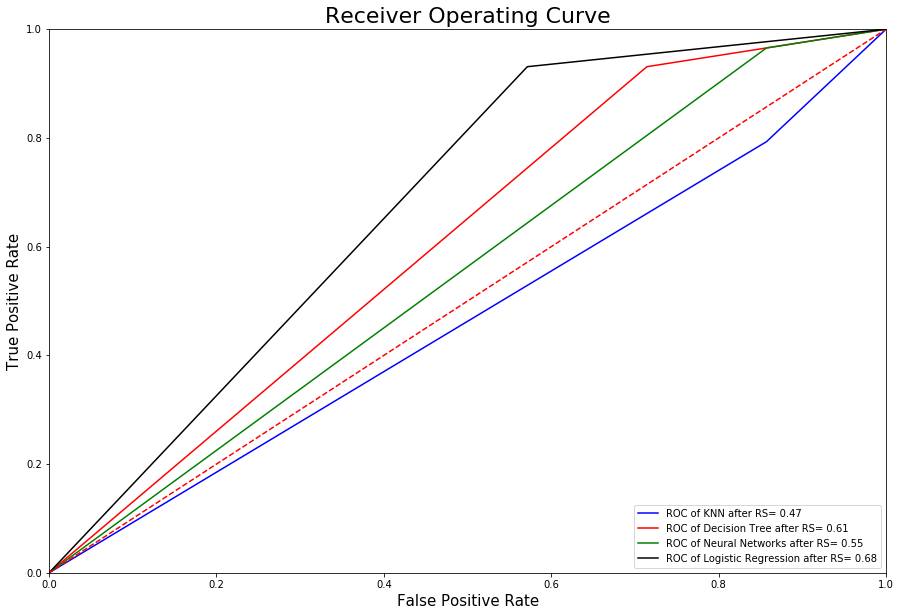

In [38]:
import sklearn.metrics as metrics
roc_auc1=metrics.auc(fprknnrs,tprknnrs)
roc_auc2=metrics.auc(fprdtrs,tprdtrs)
roc_auc3=metrics.auc(fprnnrs,tprnnrs)
roc_auc4=metrics.auc(fprlrgrs,tprlrgrs)

# Method-I: PLot
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,10))
plt.title("Receiver Operating Curve")
plt.plot(fprknnrs,tprknnrs,"b",label="ROC of KNN after RS= %0.2f" % roc_auc1)
plt.plot(fprdtrs,tprdtrs,"r",label="ROC of Decision Tree after RS= %0.2f" % roc_auc2)
plt.plot(fprnnrs,tprnnrs,"g",label="ROC of Neural Networks after RS= %0.2f" % roc_auc3)
plt.plot(fprlrgrs,tprlrgrs,"k",label="ROC of Logistic Regression after RS= %0.2f" % roc_auc4)


plt.legend(loc="lower right")
plt.plot([0, 1],[0, 1],"r--")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")

plt.rcParams.update({'font.size': 15})
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=22)

# Comparision of 4 algorithms before and after hyperparameter tuning

In [39]:
algos1=["K Nearest Neighbor","Neural Networks","Decision Tree","Logistic Regression"]
acc1=[accknn,accnn,accdt,acclrg]
recall1=[recallknn,recallnn,recalldt,recalllrg]
prec1=[precknn,precnn,precdt,preclrg]
comp1={"Algorithms":algos1,"Accuracies before RS":acc1,"Recall before RS":recall1,"Precision before RS":prec1}
compdf1=pd.DataFrame(comp1)
display(compdf1.sort_values(by=["Accuracies before RS","Recall before RS","Precision before RS"], ascending=False))
acc2=[accknnrs,accnnrs,accdtrs,acclrgrs]
recall2=[recallknnrs,recallnnrs,recalldtrs,recalllrgrs]
prec2=[precknnrs,precnnrs,precdtrs,preclrgrs]
comp2={"Algorithms":algos1,"Accuracies after RS":acc2,"Recall after RS":recall2,"Precision after RS":prec2}
compdf2=pd.DataFrame(comp2)
display(compdf2.sort_values(by=["Accuracies after RS","Recall after RS","Precision after RS"], ascending=False))

,Algorithms,Accuracies before RS,Recall before RS,Precision before RS
3,Logistic Regression,83.333333,93.103448,87.096774
0,K Nearest Neighbor,77.777778,96.551724,80.000000
2,Decision Tree,72.222222,79.310345,85.185185
1,Neural Networks,30.555556,27.586207,66.666667


,Algorithms,Accuracies after RS,Recall after RS,Precision after RS
3,Logistic Regression,83.333333,93.103448,87.096774
1,Neural Networks,80.555556,96.551724,82.352941
2,Decision Tree,80.555556,93.103448,84.375000
0,K Nearest Neighbor,66.666667,79.310345,79.310345


Here we can see that after hyperparatmeter tuning using random search our neural networks has increased extremely.